In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.lines import Line2D
import cmb_anomaly_utils as cau

plt.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('legend', facecolor='white', edgecolor='k', framealpha=1)
plt.rcParams['xtick.major.size'] = 3.5
plt.rcParams['ytick.major.size'] = 3.5
plt.rcParams['xtick.labelsize']  = 12
plt.rcParams['ytick.labelsize']  = 12

def custom_save_fig(fig, fpath):
    for ftype in ['.png', '.pdf']:
        fig.savefig(fpath + ftype, facecolor=(1,1,1,0), dpi=300, transparent=True)

0.039


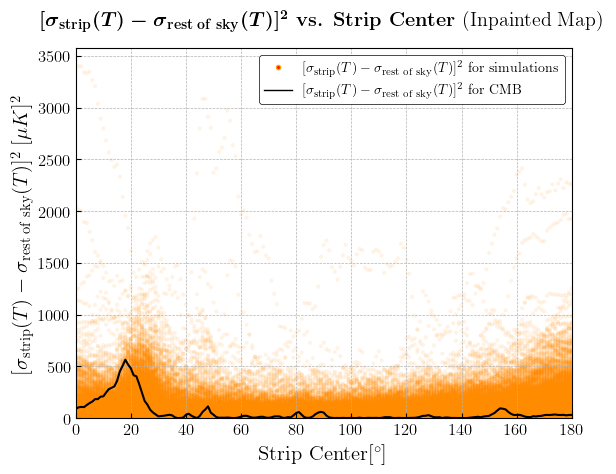

In [3]:
kwargs = {
'base_path':    './output/measure_results_mac_dir/',
'observable':   cau.const.OBS_T,
'tpcf_mode':    cau.const.TPCF_TT,
'is_masked':    False,
'geom_flag':    cau.const.STRIP_FLAG,
'measure_flag': cau.const.D_STD2_FLAG,
}

out_path    = cau.output.ensure_output_path(**kwargs)
fnames      = os.listdir(out_path)
range_fname     = [name for name in fnames if 'range' in name ][0]
cmb_acc_fname   = [name for name in fnames if 'cmb' in name and '30' in name][0]
sims_acc_fnames = [name for name in fnames if 'sim' in name and '30' in name]

_range  = np.loadtxt(out_path + range_fname)
cmb_acc = np.loadtxt(out_path + cmb_acc_fname)
argmax  = np.argmax(cmb_acc)

p_value = 0

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # simulations
    for fname in sims_acc_fnames:
        sim_acc    = np.loadtxt(out_path + fname)
        if sim_acc[argmax] > cmb_acc[argmax]:
            p_value += 1
        ax.scatter(_range, sim_acc,
                   marker='.', edgecolors='none', linewidths=1, c='darkorange', alpha=.1)
    # cmb
    ax.plot(_range, cmb_acc, color='k', linewidth=1.5)
    # labels
    ax.set_xlabel(cau.output.get_xlabel_tex(**kwargs), size=15)
    ax.set_ylabel(cau.output.get_ylabel_tex(**kwargs), size=15)
    ax.set_title(cau.output.get_title_tex(**kwargs), y = 1.04)
    # limits
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymin = 0)
    # legends
    sample_curves = [
        Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
        Line2D([0], [0], ls='-',color='k', lw=1),
        ]
    measure_text = cau.output.get_measure_tex(**kwargs)
    ax.legend(  sample_curves, [
                measure_text + r' for simulations',
                measure_text + r' for CMB',
            ])
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    # fig.savefig('./output/LatestPlot.png', facecolor=(1,1,1,0), dpi=300, transparent=True)

print(p_value / 1000)
plt.show()